<h1>Reaction Time Analysis</h1>

<p>The goal of this experiment is to detect, whether there is a difference in the speed with which the users can press keys on a keyboard when given either attentive or pre-attentive tasks. This experiment also should reveal if the speed varies if there are other distracting factors or not.</p>
<p>We think that subjects may react faster to preattentive stimuli and that distractions generally slower reactions to either kind of stimuli. But of course it is still possible, that there is no difference at all or things are the other way round. Therefore we have chosen two nondirectional pairs of hypotheses for this experiment:</p>
<p><b>H0</b>: Concerning the reaction speed to stimuli, there is <b>NO</b> difference between pre-attentive and attentive stimuli.</p>
<p><b>H1:</b> Concerning the reaction speed to stimuli, there is <b>A</b> difference between pre-attentive and attentive stimuli.</p>
<p>and</p>
<p><b>H0</b>: As users are reacting to attentive and pre-attentive stimuli, there is <b>NO</b> difference in reaction speed if they are presented visual distractions or aren’t.</p>
<p><b>H1</b>: As users are reacting to attentive and pre-attentive stimuli, there is <b>A</b> difference in reaction speed if they are presented visual distractions or aren’t.</p>
<p>Four subjects (2 female, 2 male), ranging in age from 22 to 30, were tested for this experiment. All subjects were media informatics students.</p>
<p>To test our hypotheses, a python program was developed, logging the speed of button presses. This opens up the possibility of simple and effective reaction tests under consistent conditions.</p>
<p>The program presents subjects with several screens containing either words or arrows. If a word is shown, a user has to decide if the named “thing” does usually fly or not. If it does, a user has to press the “Arrow Key_UP”, otherwise the user has to press the “Arrow Key_Down”. As there is a process of active thinking involved (“can it fly?”), these words a attentive stimluli.</p>
<p>As preattentive stimuli the user is presented arrows facing up or down. Depending on their direction a user has to press the corresponding arrow key. These are simple shapes and their call for action can be interpreted by the user without a real thought process.</p>
<p>Additionally the user sometimes is distracted by visual patterns, containing of other arrows. These are chosen to mess with the users mind, and to confuse the user, which button should be pressed.</p>
<p>To cover all these different stimuli, the experiment is divided in 4 sections. There is a section with attentive stimuli with distraction (AD), one without distraction (AN) and a section with pre-attentive stimuli with distraction (PD) and one without (PN). These sections are pseudo-randomized through the use of a balanced latin-square. In each section a subject is confronted with 11 repetitions of the same condition. Stimuli are shown in a predetermined time intervall (500ms). Tests are conducted on the keyboard of a late 2013 Macbook Pro 13 inch, with standard german laptop keyboard layout.</p>

<h2>Data Import</h2>

This section contains code handling the import of experiment data.

In [2]:
import csv
# array for all data
overall_data= []
# opens a file called 'data.csv'
with open('data.csv', newline='') as csvfile:
    # reads content of file delimited by comma and saves as data
    data = csv.reader(csvfile, delimiter=',')
    # saves every row from data in overall_data
    # this is done because it seems the file instantly closes after use in this cell
    # therefore the data variable seems to become useless
    for row in data:
        overall_data.append(row)    

<h2>Preparation of data</h2>

Now the data will be prepared for further processing.
Four clusters of data will be build, containing times for attentive and preattentive stimuli, as well as times with and without distractions.

At first the two groups for attentive and preattentive stimuli will be created.

In [6]:
# overall data is divived into two arrays containing attentive or preattentive reaction times
mental_complexity_column_num = 2
time_column_num = 7
# cannot use row as index position, therefore a counter is needed...
row_counter = 0

times_attentive = []
times_preattentive = []

# checks if the word attentive or preattentive is in the row and adds the row to the correspondent array
# iterates over rows
for row in overall_data:
    # checks for keyword attentive
    if overall_data[row_counter][mental_complexity_column_num] == 'attentive':
        # adds reaction times as float to attentive list
        times_attentive.append(float(overall_data[row_counter][time_column_num]))
    # checks for keyword preattentive
    elif overall_data[row_counter][mental_complexity_column_num] == 'pre-attentive':
        # adds reaction times as float to preattentive list
        times_preattentive.append(float(overall_data[row_counter][time_column_num]))
    # checks for other cases. these are column names in our csv-file
    else:
        # skips them
        pass
    row_counter+=1

In the same way the groups for distraction and no distraction are built.

In [7]:
# overall data is divived into two arrays containing attentive or preattentive reaction times
distraction_status_column_num = 3
time_column_num = 7
# counter needs a reset
row_counter = 0

times_distraction = []
times_nodistraction = []

# checks if a the distraction status is marked true or false and adds the row to the correspondent array
# iterates over rows
for row in overall_data:
    # checks for keyword True
    if overall_data[row_counter][distraction_status_column_num] == 'True':
        # adds reaction times as float to distraction list
        times_distraction.append(float(overall_data[row_counter][time_column_num]))
    # checks for keyword False
    elif overall_data[row_counter][distraction_status_column_num] == 'False':
        # adds reaction times as float to nodistraction list
        times_nodistraction.append(float(overall_data[row_counter][time_column_num]))
    # checks for other cases. these are column names in our csv-file
    else:
        # skips them
        pass
    row_counter+=1

<h2>Scatter plots</h2>

Now scatter plots for each group are created and a combined plot follows in the end.

<u>Reaction times for attentive stimuli:</u>

In [9]:
# imports for plots
%matplotlib inline
from pylab import *

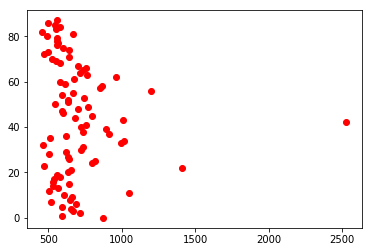

In [39]:
# sets the range for the axis values
IDatt = range (len(times_attentive))
# draws scatter plot
att = scatter(times_attentive, IDatt, color='red')

<u>Reaction times for pre-attentive stimuli:</u>

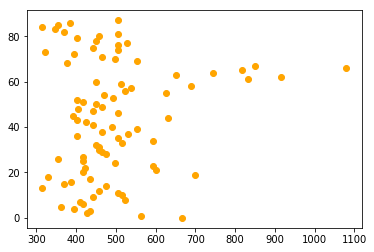

In [24]:
# sets the range for the axis values
IDpreatt = range (len(times_preattentive))
# draws the scatter plot
preatt = scatter(times_preattentive, IDpreatt, color='orange')

<u>Reaction times with distraction:</u>

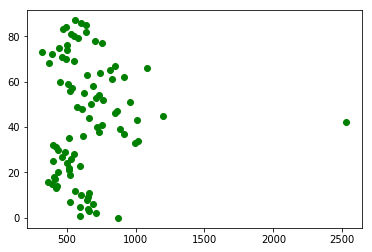

In [25]:
# sets the range for the axis values
IDdist = range (len(times_distraction))
# draws the scatter plot
dist = scatter(times_distraction, IDdist, color='green')

<u>Reaction times without distraction:</u>

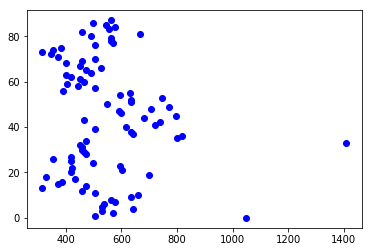

In [26]:
# sets the range for the axis values
IDnodist = range (len(times_nodistraction))
# draws the scatter plot
nodist = scatter(times_nodistraction, IDnodist, color="blue")

<u>Reaction times combined:</u>

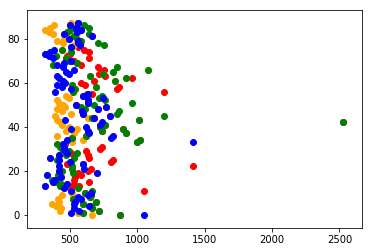

In [30]:
# sets the maximum range of all earlier used ranges as range for the axis values
cID = range(len(max(times_attentive, times_preattentive, times_distraction, times_nodistraction)))
# draws the four scatter plots
catt = scatter(times_attentive, cID, color = 'red')
cpreatt = scatter(times_preattentive, cID, color = 'orange')
cdist = scatter(times_distraction, cID, color = 'green')
cnodist = scatter(times_nodistraction, cID, color = 'blue')

<h2>Box plots</h2>

This section shows the boxplot for all four data samples.

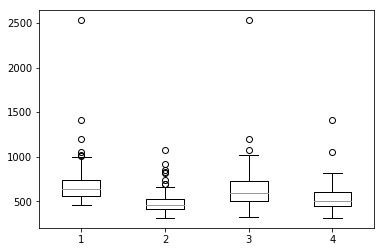

In [49]:
# draws the boxplots
boxplot([times_attentive, times_preattentive, times_distraction, times_nodistraction]);

<h2>T-tests</h2>

Now two t-tests are performed to evaluate our hypotheses. First the difference between attentive and preattentive stimuli is tested, after that the difference with or without distraction is tested.

In [141]:
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp

In [143]:
# t-test for difference attentive and preattentive
t_statistic, p_value = ttest_ind(times_attentive, times_preattentive)
print("p-value: %2.3f" %(p_value))
# below 0.05 is statistically significant

p-value: 0.000


In [144]:
# t-test for difference distraction and nodistraction
t_statistic, p_value = ttest_ind(times_distraction, times_nodistraction)
print("p-value: %2.3f" %(p_value))
# below 0.05 is statistically significant

p-value: 0.002


<h2>Brief discussion of results</h2>

both p-values are lower than 0.05 so both results are statistically significant